In [299]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [233]:
#read new combined cleaned dataset
df = pd.read_csv("..\Project 1\WSB Data\WSB.csv", index_col=0)

In [133]:
#sort by num_mentions rolled up into ticker
df_num_mentions =df.sort_values(["num_mentions","ticker"],ascending=False).groupby("ticker")
df_num_mentions = df.groupby('ticker')['num_mentions'].sum().sort_values(ascending=False)
df_num_mentions.head(20)

ticker
GME     122643
BB       41669
AMC      38061
PLTR     20785
CLOV     15889
WISH     10965
SPY      10823
RKT      10520
TSLA     10194
CLNE      8252
NOK       8133
UWMC      6239
AMD       5620
TLRY      5362
SNDL      5133
AAPL      5040
WKHS      4565
MVIS      4465
NIO       4198
ALL       4063
Name: num_mentions, dtype: int64

In [300]:
df_num_mentions.value_counts()

1       838
2       488
3       294
4       175
5       146
       ... 
1741      1
1233      1
1359      1
3568      1
1835      1
Name: num_mentions, Length: 362, dtype: int64

Want to show outliers here
- basically want to show on WallStreetBets that there was a distinct popularity around a few names

Text(0.5, 1.0, 'Predicted Positive & Negative context')

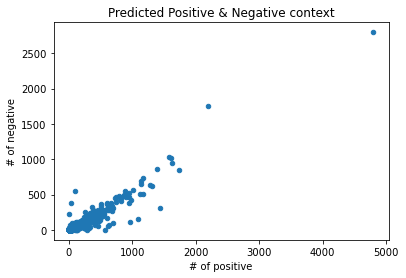

In [213]:
df_test = df[['pos_count','neg_count']]
df_test.plot.scatter(x = 'pos_count', y = 'neg_count')
plt.xlabel('# of positive')
plt.ylabel('# of negative')
plt.title("Predicted Positive & Negative context")

Chart to show which names were most widely discussed and mentioned (below)
- GME, AMC and BB widely shown to be outliers

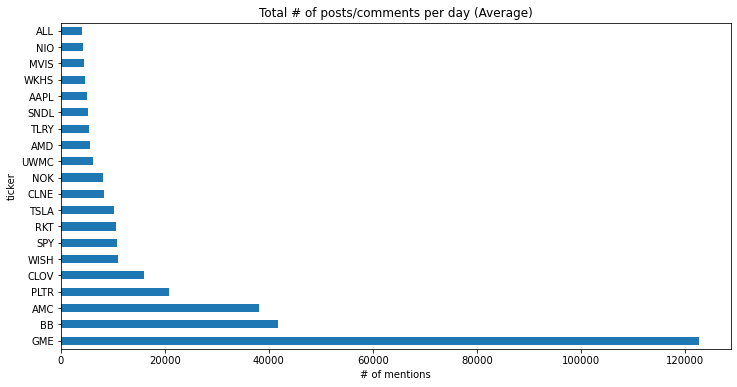

In [215]:
# making a chart off of num_mentions (above)
plt.figure(figsize = (12,6))
plt.title("Total # of posts/comments per day (Average)")
plt.xlabel('# of mentions')
df_num_mentions.head(20).plot(kind = 'barh')

2nd Chart involving the percentage of mentions of a stock in a single day
* want to reinforce why we chose GME AMC and BB
* can show NAPA as an outlier because of only 3 data points in this

In [138]:
#sort by pct_mentions rolled up into ticker
df_pct_mentions = df.sort_values(["pct_mentions","ticker"],ascending=False).groupby("ticker")
#convert into df
df_pct_mentions = df.groupby('ticker')[['pct_mentions']].mean().sort_values(by='pct_mentions',ascending=False)
# * 100 to % col to reflect percentages
df_pct_mentions['pct_mentions'] = 100 * df_pct_mentions['pct_mentions'] 

Text(0, 0.5, '% of all mentions in a day')

<Figure size 864x432 with 0 Axes>

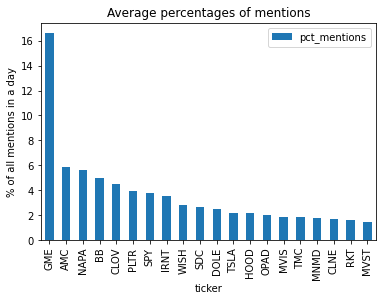

In [203]:
# making a chart off of num_mentions (above)

plt.figure(figsize=(12,6)) 
df_pct_mentions.head(20).plot(kind='bar')
plt.title('Average percentages of mentions')
plt.ylabel('% of all mentions in a day')

In [125]:
df_pct_mentions.head()

,pct_mentions
ticker,
GME,16.591133
AMC,5.882051
NAPA,5.666667
BB,4.985222
CLOV,4.517857


NAPA seems like an outlier with few data points

In [301]:
#check how many data points NAPA has and can remove for consideration if it is
df[df.index == 'NAPA']

,date,url,num_mentions,pct_mentions,pos_count,neg_count,bullish_pct,bearish_pct,neutral_pct,price,price_change_net,price_change_pct,time_of_price
ticker,,,,,,,,,,,,,
NAPA,2021-03-23,https://finance.yahoo.com/quote/NAPA?p=NAPA,10,0.005,7,0,0.7,0.0,0.3,19.40,0.40,0.0211,At close: 4:00PM EDT
NAPA,2021-04-07,https://finance.yahoo.com/quote/NAPA?p=NAPA,1,0.005,1,0,1.0,0.0,0.0,17.54,0.02,0.0011,At close: 4:00PM EDT
NAPA,2021-07-16,https://finance.yahoo.com/quote/NAPA?p=NAPA,288,0.160,288,0,1.0,0.0,0.0,20.69,-0.68,-0.0316,As of 1:12PM EDT. Market open.


Explore the # of times a stock was mentioned in a predicted positive context for all the days rolled up
- also do the same for the negative context for all the days rolled up
- GME, BB, AMC once again are the top 3

In [296]:
#sort by pos_count rolled up into ticker
df_pos_count =df.sort_values(["pos_count","ticker"],ascending=False).groupby("ticker")
df_pos_count = df.groupby('ticker')['pos_count'].sum().sort_values(ascending=False)
df_pos_count.head(5)

ticker
GME     57609
BB      17018
AMC     16999
PLTR     8497
WISH     7928
Name: pos_count, dtype: int64

In [297]:
#sort by neg_count rolled up into ticker
df_neg_count =df.sort_values(["neg_count","ticker"],ascending=False).groupby("ticker")
df_neg_count = df.groupby('ticker')['neg_count'].sum().sort_values(ascending=False)
df_neg_count.head(5)

#df_neg_count.to_csv('test.csv')

ticker
GME     32026
AMC      8611
BB       7202
PLTR     4758
SPY      3128
Name: neg_count, dtype: int64

Seems like the same top 3 names come up.  What is the ratio of positive context vs all pos/neg context?
* Going to select GME, AMC and BB for further analysis since they seem to be the most talked about names on reddit
* over the course of the period, the context was more skewed positive than negative for each of these names

In [298]:
#create new dataframe to get calculation ready
df_total_count = pd.DataFrame(zip(df.index, df.pos_count, df.neg_count))
df_total_count.rename(columns={0:'ticker', 1:'pos_count', 2:'neg_count'}, inplace=True)
df_total_count.set_index('ticker', inplace=True)

#create the sum of the pos_count and neg_count
sum_col = df_total_count['pos_count'] + df_total_count['neg_count']
df_total_count['total_count'] = sum_col
df_total_count

#create the ratio of the pos_count over total_count
ratio_col = (df_total_count['pos_count'] / df_total_count['total_count']) * 100
df_total_count['ratio'] = ratio_col

#sort and average the daily ratio
df_total_count1 = df_total_count.sort_values(["total_count","ticker"],ascending=False).groupby("ticker")
df_total_count1 = df_total_count.groupby('ticker')[['total_count','ratio']].mean().sort_values(by='total_count',ascending=False)
df_total_count1.head(3)

,total_count,ratio
ticker,,
GME,441.551724,64.433524
AMC,131.333333,63.050788
BB,119.310345,69.422430


Want to look at the volume Year-over-Year (YoY) for each of these names individually and see if trading activity picked up
- Will take total monthly volume from Jan-Sept for 2020 and compare it to 2021
- This will normalize any events such as expiration dates, company earnings, etc..
- If there was more talk about these names on reddit and people there traded these names, should see elevated trading volume

In [470]:
#function to read both dataframes and merge them based on ticker

def vol_merge(ticker):
    #read in both 2020 and 2021
    str = f'{ticker}_volume20.csv'
    str1 = f'{ticker}_volume21.csv'
    
    df = pd.read_csv(str, parse_dates=['Date'])
    df1 = pd.read_csv(str1, parse_dates=['Date'])
                      
    #strip the year from the date so we can merge the 2 dataframes
    df['Date'] = df['Date'].dt.strftime('%m-%d')
    df1['Date'] = df1['Date'].dt.strftime('%m-%d')

    #reset index column to date
    df.set_index('Date')
    df1.set_index('Date')
    
    #merge the two dataframes by index (Date)
    df2 = pd.merge(left=df, left_index=True, right=df1, right_index=True, how='inner')
    
    #rename columns to avoid confusion
    df3 = df2.rename(columns={'Date_x': 'Date', 'Volume_x':'Vol_20','Volume_y':'Vol_21'})
    df3.round({"Vol_20":2})
    
    #create new column that calculates YoY change in the volume
    # also round numbers 2 decimal places
    vol_change = (df3['Vol_21'] - df3['Vol_20']) / (df3['Vol_20']) * 100
    df3['Volume Change'] = vol_change
    df4 = df3.round(2)

    return df4

In [471]:
df_GME = vol_merge('GME')
df_AMC = vol_merge('AMC')
df_BB = vol_merge('BB')
df_SPY = vol_merge('SPY')

In [472]:
df_SPY

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Vol_20,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Vol_21,Volume Change
0,01-01,323.54,332.95,320.36,321.73,312.77,1392003800,01-01,375.31,385.85,364.82,370.07,366.48,1402265400,0.74
1,02-01,323.35,339.08,285.54,296.26,288.01,2110214900,02-01,373.72,394.17,370.38,380.36,376.68,1307806200,-38.02
2,03-01,298.21,313.84,218.26,257.75,250.57,5926017600,03-01,385.59,398.12,371.88,396.33,392.49,2401715800,-59.47
3,04-01,247.98,294.88,243.90,290.48,284.05,2819312300,04-01,398.40,420.72,398.18,417.30,414.61,1462106600,-48.14
4,05-01,285.31,306.84,272.99,304.32,297.59,1910460500,05-01,419.43,422.82,404.00,420.04,417.33,1547235900,-19.01
5,06-01,303.62,323.41,296.74,308.36,301.54,2358674500,06-01,422.57,428.78,414.70,428.06,425.30,1282152400,-45.64
6,07-01,309.57,327.23,309.07,326.52,320.70,1505145300,07-01,428.87,441.80,421.97,438.51,437.11,1422044100,-5.52
7,08-01,328.32,351.30,327.73,349.31,343.08,1045563300,08-01,440.34,453.07,436.10,451.56,450.12,1253787500,19.92
8,09-01,350.21,358.75,319.80,334.89,328.92,1814712700,09-01,452.56,454.05,428.78,429.14,427.77,1745134600,-3.83


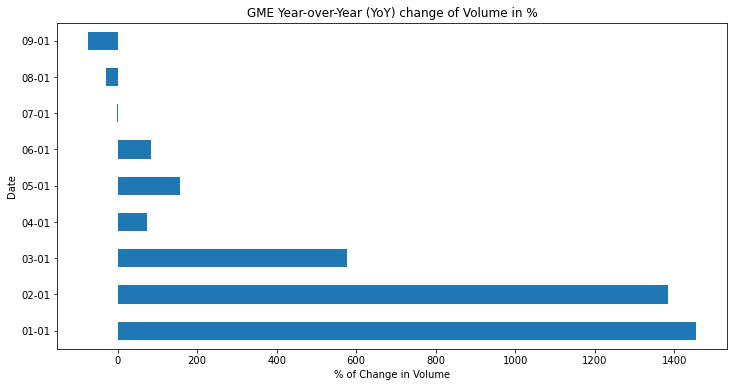

In [478]:
#GME
plt.figure(figsize = (12,6))
plt.title("GME Year-over-Year (YoY) change of Volume in %")
plt.xlabel('% of Change in Volume')
df_GME.set_index("Date")["Volume Change"].plot.barh()

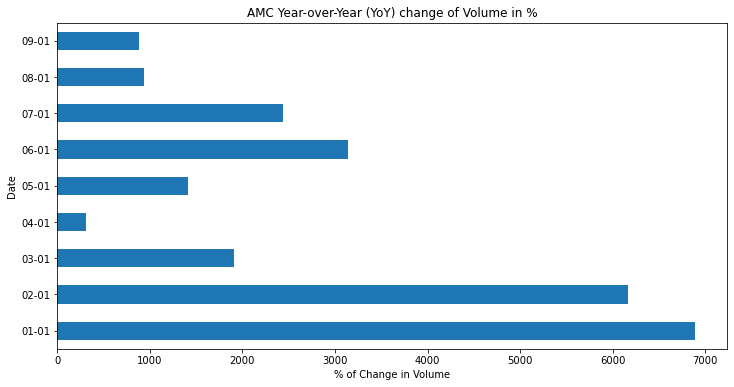

In [479]:
#AMC
plt.figure(figsize = (12,6))
plt.title("AMC Year-over-Year (YoY) change of Volume in %")
plt.xlabel('% of Change in Volume')
df_AMC.set_index("Date")["Volume Change"].plot.barh()

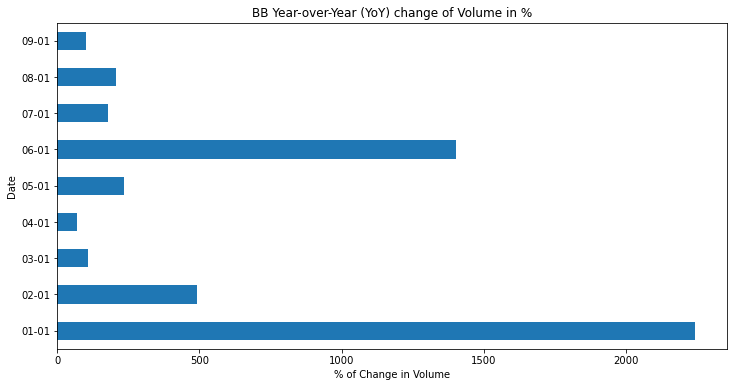

In [480]:
#BB
plt.figure(figsize = (12,6))
plt.title("BB Year-over-Year (YoY) change of Volume in %")
plt.xlabel('% of Change in Volume')
df_BB.set_index("Date")["Volume Change"].plot.barh()

The code below is individual stock rate of return and stock price charts
- GME, AMC, BBY were taken as the most mentioned stocks
- Also added SPY as an indicator of the overall market (SPY is an ETF that is widely used to track the S&P index)

In [112]:
def stock_return(stock):
    
    #read the csv file and returns rate of return in percentage
    df = pd.read_csv(stock)
    #return = (current px - initial px) / initial px * 100
    return ((df.iloc[-1]['Close'] - df.iloc[0]['Close']) / df.iloc[0]['Close']) * 100

In [484]:
stock_return("GME.csv").round(2)

722.68

In [482]:
stock_return("AMC.csv").round(2)

1456.07

In [483]:
stock_return("BB.csv").round(2)

36.48

In [107]:
# created function to produce simple stock charts
def stock_chart(csv):
    
    #read file and convert into datetime
    df_temp = pd.read_csv(csv, parse_dates=['Date'])

    return df_temp.set_index("Date")["Close"].plot()

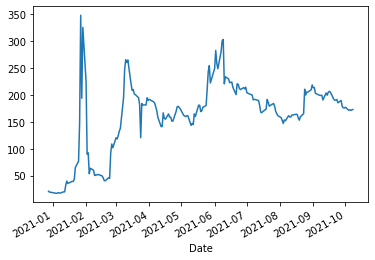

In [109]:
stock_chart('GME.csv')

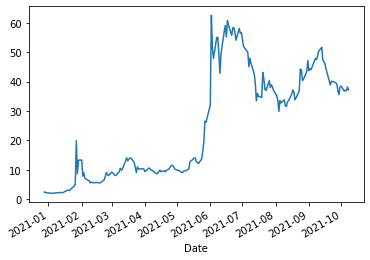

In [110]:
stock_chart('AMC.csv')

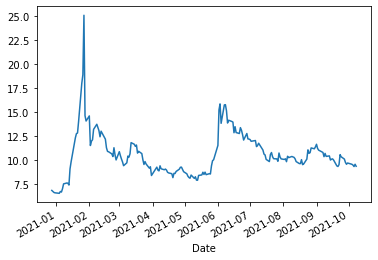

In [111]:
stock_chart('BB.csv')